<a href="https://colab.research.google.com/github/mohamedfaysal/Topic-Modelling/blob/main/Topic_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
from itertools import islice!

In [ ]:
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

In [ ]:
newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
len(newsgroups.data)

11314

In [ ]:
len(newsgroups.target_names)

20

In [ ]:
len(newsgroups.target)

11314

In [ ]:
newsgroups.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [ ]:
newsgroups.target[0]

7

In [ ]:
newsgroups.target_names[7]

'rec.autos'

In [ ]:
df = pd.DataFrame({"title" : newsgroups.target,
                   "data" : newsgroups.data})

In [ ]:
df.head()

,title,data
0,7,I was wondering if anyone out there could enli...
1,4,A fair number of brave souls who upgraded thei...
2,4,"well folks, my mac plus finally gave up the gh..."
3,1,\nDo you have Weitek's address/phone number? ...
4,14,"From article <C5owCB.n3p@world.std.com>, by to..."


In [ ]:
dict = {0 : 'alt.atheism',
        1 : 'comp.graphics',
        2 : 'comp.os.ms-windows.misc',
        3 : 'comp.sys.ibm.pc.hardware',
        4 : 'comp.sys.mac.hardware',
        5 : 'comp.windows.x',
        6 : 'misc.forsale',
        7 : 'rec.autos',
        8 : 'rec.motorcycles',
        9 : 'rec.sport.baseball',
        10 : 'rec.sport.hockey',
        11 : 'sci.crypt',
        12 : 'sci.electronics',
        13 : 'sci.med',
        14 : 'sci.space',
        15 : 'soc.religion.christian',
        16 : 'talk.politics.guns',
        17 : 'talk.politics.mideast',
        18 : 'talk.politics.misc',
        19 : 'talk.religion.misc'}

In [ ]:
df['title'] = df['title'].replace(dict)

In [ ]:
for i, j in islice(zip(df['title'], df['data']), 5):
  print(i)
  print(j)
  print("\n")

rec.autos
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


comp.sys.mac.hardware
A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade

In [ ]:
for i in range(10):
  print(df['data'][i])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. T

# Preprocessing

In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.3 MB/s eta 0:00:00


In [ ]:
from collections import Counter
import re
import string
from spellchecker import SpellChecker

In [ ]:
def remove_html_tags_func(text):
  return re.sub(r'<.*?>', '', text)

In [ ]:
def remove_url_func(text):
  return re.sub(r'https?://\S+|www\.\S+', '', text)

In [ ]:
def remove_punctuations_func(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

In [ ]:
def remove_extra_whitespaces_func(text):
  return re.sub(r'^\s*|\s\s*', ' ', text).strip()

In [ ]:
def remove_irr_char_func(text):
  return re.sub(r'[^a-zA-Z]', ' ', text)

In [ ]:
df['text'] = df['data'].str.lower()
df['text'] = df['data'].apply(remove_html_tags_func)
df['text'] = df['data'].apply(remove_url_func)
df['text'] = df['data'].apply(remove_punctuations_func)
df['text'] = df['data'].apply(remove_extra_whitespaces_func)
df['text'] = df['data'].apply(remove_irr_char_func)

In [ ]:
for i in range(20):
  print(df['text'][i])

I was wondering if anyone out there could enlighten me on this car I saw the other day  It was a   door sports car  looked to be from the late   s  early   s  It was called a Bricklin  The doors were really small  In addition  the front bumper was separate from the rest of the body  This is  all I know  If anyone can tellme a model name  engine specs  years of production  where this car is made  history  or whatever info you have on this funky looking car  please e mail 
A fair number of brave souls who upgraded their SI clock oscillator have shared their experiences for this poll  Please send a brief message detailing your experiences with the procedure  Top speed attained  CPU rated speed  add on cards and adapters  heat sinks  hour of usage per day  floppy disk functionality with     and     m floppies are especially requested   I will be summarizing in the next two days  so please add to the network knowledge base if you have done the clock upgrade and haven t answered this poll  T

In [ ]:
df.head()

,title,data,text
0,rec.autos,I was wondering if anyone out there could enli...,I was wondering if anyone out there could enli...
1,comp.sys.mac.hardware,A fair number of brave souls who upgraded thei...,A fair number of brave souls who upgraded thei...
2,comp.sys.mac.hardware,"well folks, my mac plus finally gave up the gh...",well folks my mac plus finally gave up the gh...
3,comp.graphics,\nDo you have Weitek's address/phone number? ...,Do you have Weitek s address phone number I...
4,sci.space,"From article <C5owCB.n3p@world.std.com>, by to...",From article C owCB n p world std com by to...


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [ ]:
df['cleaned_text'] = df['text'].apply(remove_stopwords)

In [ ]:
for i in range(20):
  print(df['cleaned_text'][i])

wondering anyone could enlighten car saw day door sports car looked late early called Bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please e mail
fair number brave souls upgraded SI clock oscillator shared experiences poll Please send brief message detailing experiences procedure Top speed attained CPU rated speed add cards adapters heat sinks hour usage per day floppy disk functionality floppies especially requested summarizing next two days please add network knowledge base done clock upgrade answered poll Thanks
well folks mac plus finally gave ghost weekend starting life k way back sooo market new machine bit sooner intended looking picking powerbook maybe bunch questions hopefully somebody answer anybody know dirt next round powerbook introductions expected heard c supposed make appearence summer heard anymore since access macleak wondering anybody in

In [ ]:
docs = df['cleaned_text'].to_list()

In [ ]:
len(docs)

11314

In [ ]:
docs1 = docs[:1000]

# Modelling

## BERTopic

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.3 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039169 sha256=66bad3fe4b922d5a4353017d66fdc41f67cfb4a43ba4fbcf679c23bb6f0b4558
  Stored in di

In [ ]:
import bertopic
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")

In [ ]:
topics, probs = topic_model.fit_transform(docs1)

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
pd.set_option('display.max.column', 8)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,157,-1_ax_max_um_tm,"[ax, max, um, tm, di, ql, pl, ei, giz, ey]",[OTIS Project Operative Term STIMULATE file la...
1,0,347,0_windows_problem_get_thanks,"[windows, problem, get, thanks, would, use, li...",[official Request Discussion RFD creation two ...
2,1,113,1_jesus_god_one_argument,"[jesus, god, one, argument, people, matthew, s...",[follow God blindly ever asked physically blin...
3,2,96,2_period_team_play_pp,"[period, team, play, pp, game, season, year, p...",[Los Angeles Kings notes Playoffs Stauber dist...
4,3,67,3_car_engine_bike_speed,"[car, engine, bike, speed, cars, insurance, mu...",[look Motor Trend slalom times right along Int...
5,4,49,4_health_tobacco_smokeless_among,"[health, tobacco, smokeless, among, medical, u...",[told friends mine two weeks ago Koresh dead F...
6,5,33,5_woof_appeared_title_bet,"[woof, appeared, title, bet, test, oh, today, ...","[Oh bet, Woof woof, appeared today]"
7,6,24,6_israel_none_palestinian_palestinians,"[israel, none, palestinian, palestinians, land...",[Center Policy Research cpr Subject Assistance...
8,7,24,7_gun_weaver_cooper_defense,"[gun, weaver, cooper, defense, self, bill, spe...",[Note trial updates summarized reports Idaho S...
9,8,22,8_key_keys_clipper_nsa,"[key, keys, clipper, nsa, get, chip, governmen...",[Prof Denning description SkipJack mostly omit...


In [ ]:
topic_model.get_topic(1)

[('jesus', 0.035805743754486745),
 ('god', 0.030307274085544723),
 ('one', 0.022658990193016187),
 ('argument', 0.019256672644472568),
 ('people', 0.01877488231711071),
 ('matthew', 0.017717932335367212),
 ('see', 0.015801727028685486),
 ('would', 0.015229888173163593),
 ('true', 0.014741074239577101),
 ('christian', 0.014369084609233394)]

In [ ]:
topic_model.get_representative_docs(1)

['follow God blindly ever asked physically blind person follows seeing eye dog answer quite simple dog see blind person cannot acknowledge Christian blind see see illusions well reality Watched TV lately hear hear lies well truth Listen radio read newspaper Remember tastes well healthy rely one one see hear taste everything knows real God course may ask cannot trust senses know whether see hear God truth lie need faith saved must force believe God knows truth loves us enough share us even defies think know would created us love us enough help us world also trust experiences extent things defy seeming logic experience Father commands see results long term find led proper direction even though feel right time works Christians important exercises body make body strong excercises faith make faith strong one convert must choose follow God ever follow Christians wish share love received God reject accept decision although always keep offer open really want find believe believe suggest try pr

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

## Top2Vec

In [ ]:
!pip install top2vec

In [ ]:
from top2vec import Top2Vec

In [ ]:
model = Top2Vec(docs1, embedding_model='distiluse-base-multilingual-cased')

2023-11-22 14:15:19,675 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-11-22 14:15:20,887 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

rust_model.ot:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

2023-11-22 14:15:40,976 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-11-22 14:18:51,942 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-11-22 14:18:57,455 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-11-22 14:18:57,506 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
model.get_num_topics()

2

In [ ]:
topic_words, word_score, topic_nums = model.get_topics(2)

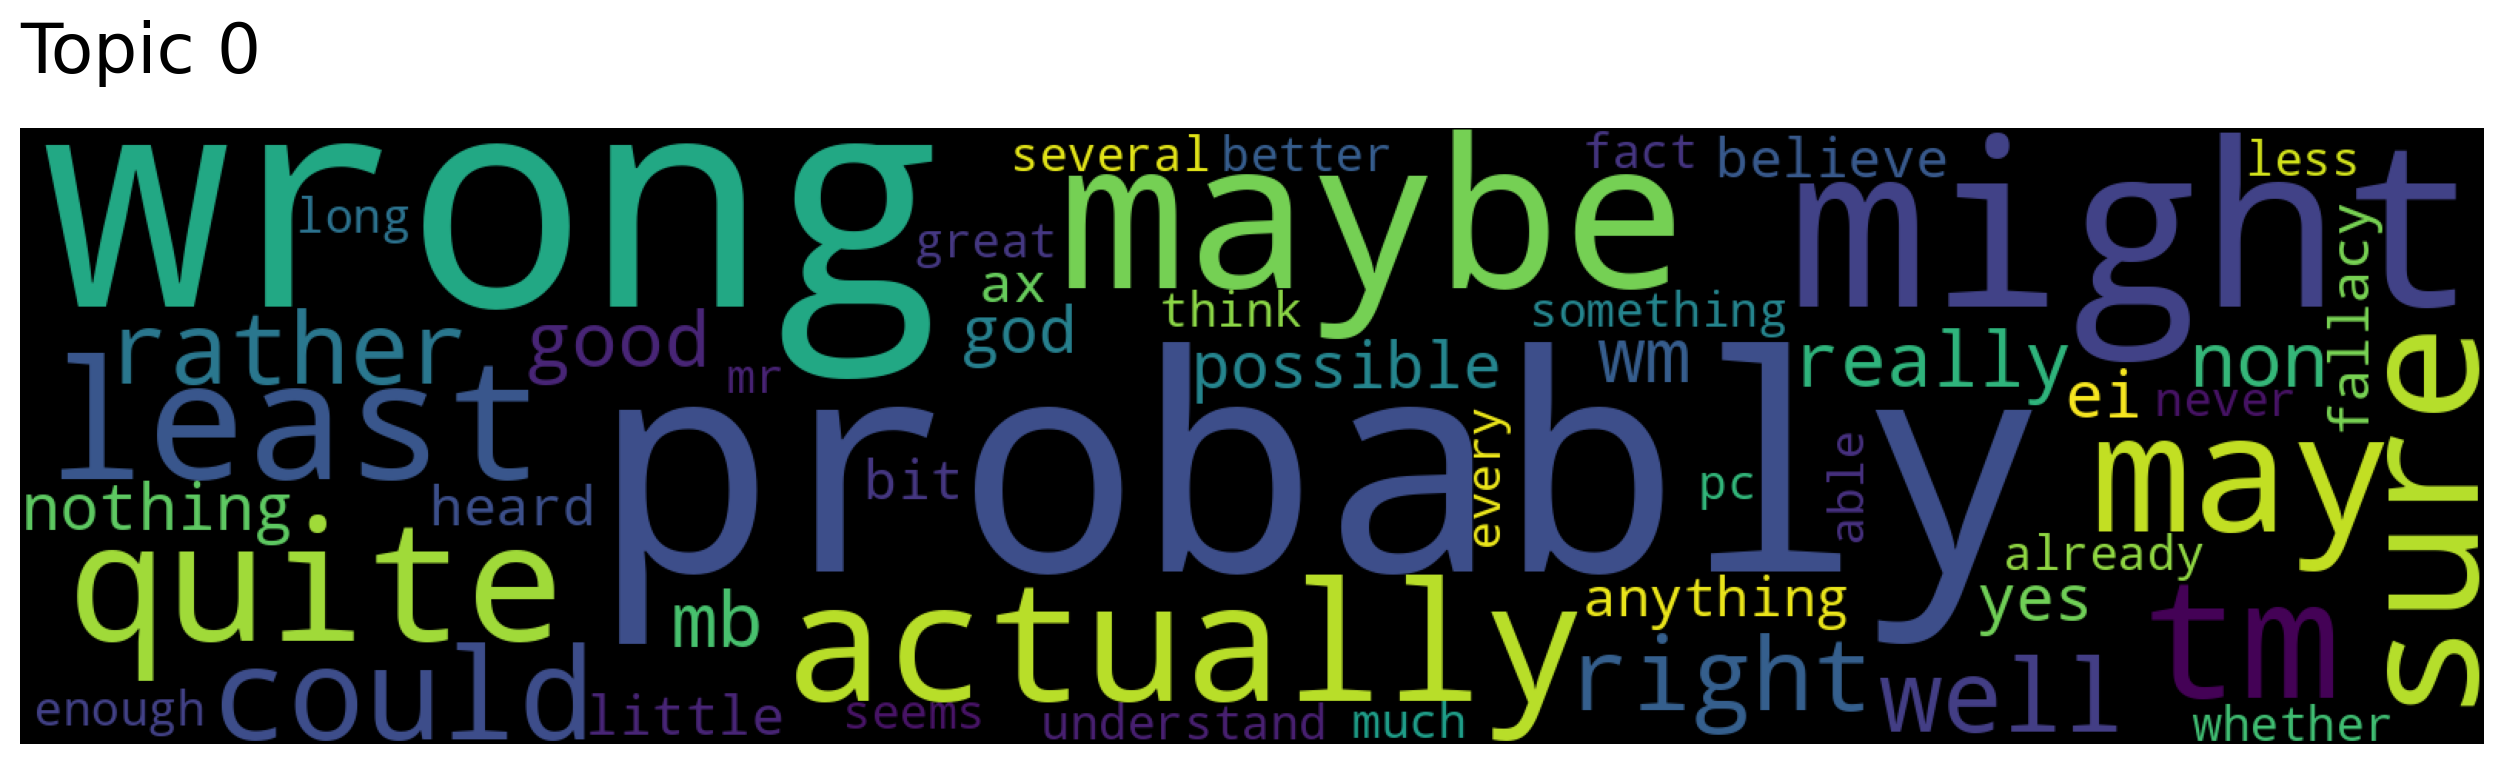

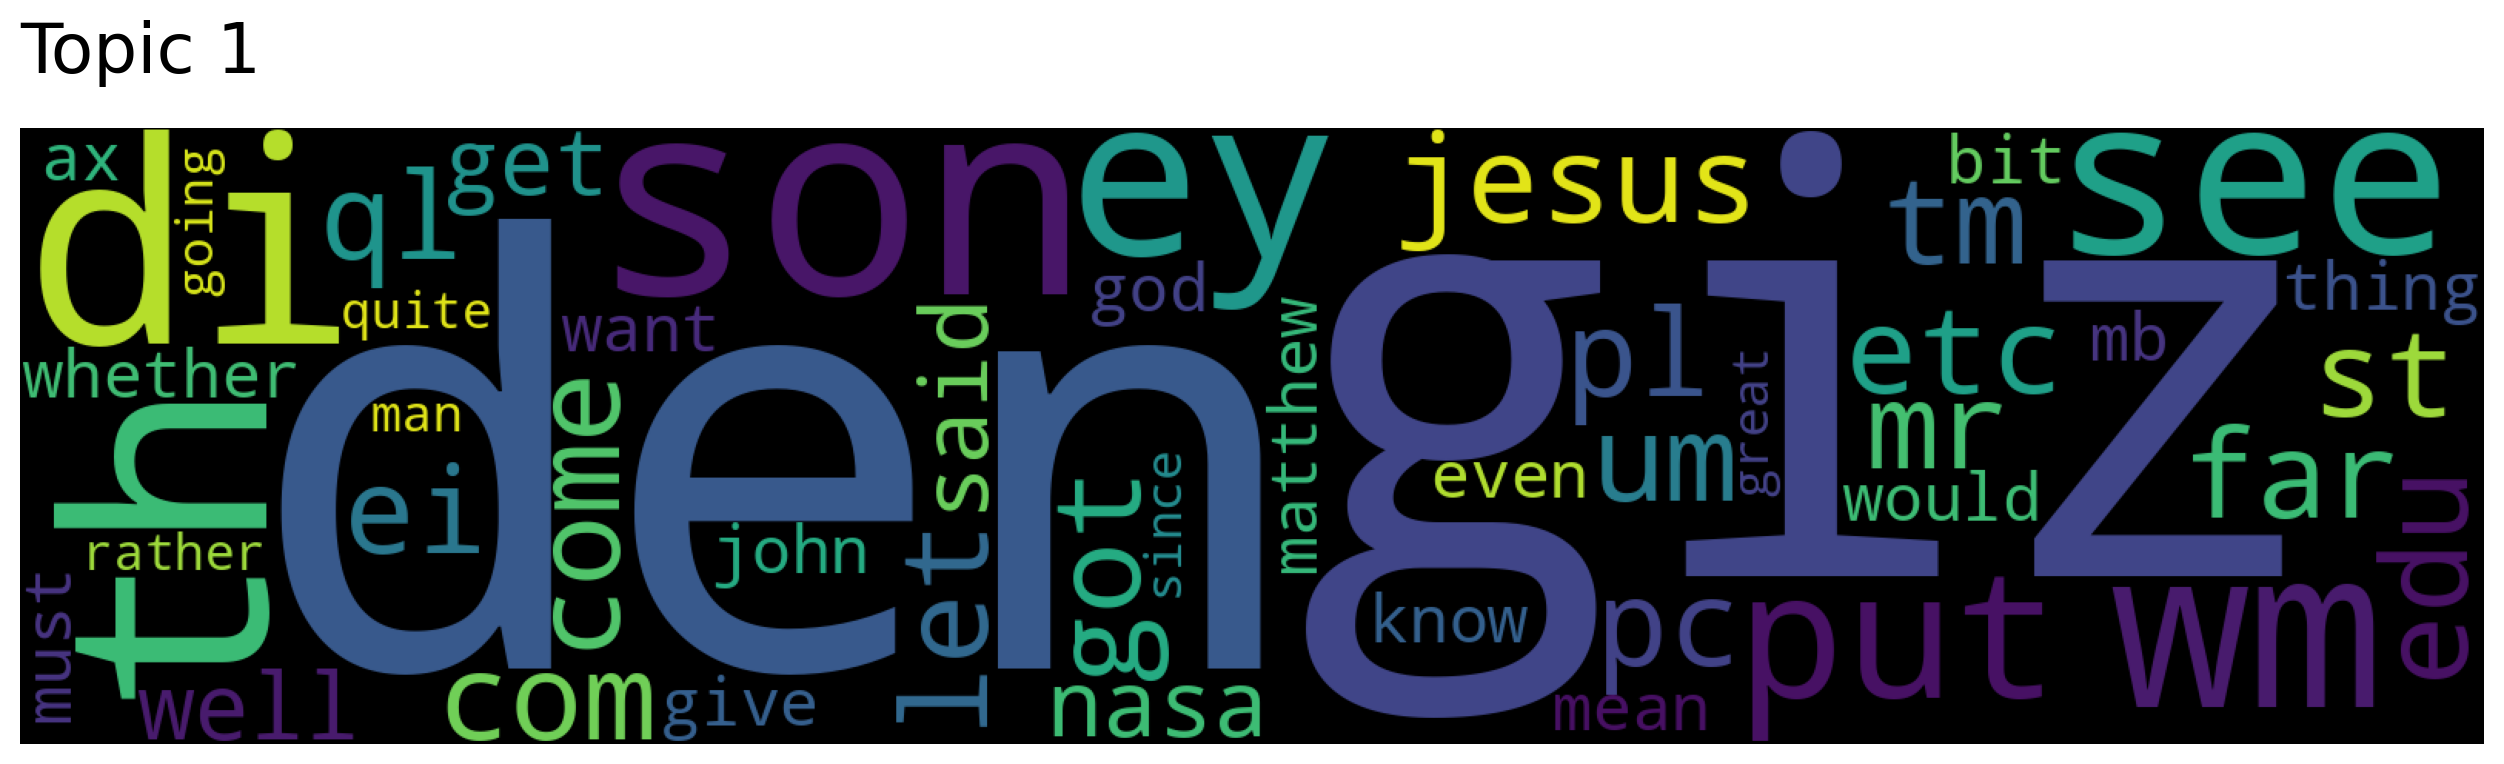

In [ ]:
for topic in topic_nums:
  model.generate_topic_wordcloud(topic)

## Latent Dirichlet Allocation (LDA)

In [ ]:
!pip install pyLDAvis
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(docs1)

In [ ]:
print (lemmatized_texts[0][0:90])

wonder enlighten car see day door sport car look late early call door really small additio


In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

In [ ]:
print (data_words[0][0:20])

['wonder', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'door', 'really', 'small', 'addition', 'front', 'bumper', 'separate', 'rest']


In [ ]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 4), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1)]
addition


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.270216  0.443038       1        1  23.096545
26     0.458893  0.203840       2        1  20.601445
15    -0.210014  0.460917       3        1  13.780914
21     0.044879  0.462887       4        1   6.929058
14     0.365958 -0.303625       5        1   6.375146
2      0.405442 -0.101483       6        1   4.157594
24     0.018124  0.095170       7        1   3.657339
10    -0.153806 -0.383588       8        1   2.897794
7     -0.357544  0.075768       9        1   2.439598
19     0.197480  0.197384      10        1   1.982143
9      0.294975  0.021213      11        1   1.736297
25    -0.034634  0.247008      12        1   1.653487
4     -0.342639 -0.125164      13        1   1.489624
27    -0.182404  0.194624      14        1   1.450647
23     0.077055 -0.335427      15        1   1.439680
17    -0.255784  0.110136      16        1   1.310307
0     -0.248409 -0.048948      17        1   1.160296
1     -0.207581 -0.225225      18        1   0.928063
13     0.122340 -0.027534      19        1   0.775186
18     0.066015 -0.126736      20        1   0.330988
8     -0.087867 -0.036422      21        1   0.318940
12     0.006528 -0.162064      22        1   0.283244
11     0.017793 -0.027228      23        1   0.241179
22    -0.050806 -0.156363      24        1   0.236471
29    -0.082052 -0.104337      25        1   0.231557
16    -0.022571 -0.077497      26        1   0.173541
20     0.000446 -0.097445      27        1   0.155642
5     -0.045216 -0.059811      28        1   0.089961
28    -0.030904 -0.055709      29        1   0.046503
6     -0.033911 -0.057380      30        1   0.030813, topic_info=         Term        Freq       Total Category  logprob  loglift
154       use  675.000000  675.000000  Default  30.0000  30.0000
96        get  629.000000  629.000000  Default  29.0000  29.0000
14       know  545.000000  545.000000  Default  28.0000  28.0000
257   problem  254.000000  254.000000  Default  27.0000  27.0000
183    system  218.000000  218.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
23       rest    0.002238   53.023754  Topic30  -9.1691  -1.9879
24        see    0.002238  493.767137  Topic30  -9.1691  -4.2193
25   separate    0.002238   19.137805  Topic30  -9.1691  -0.9689
26      small    0.002238   71.765227  Topic30  -9.1691  -2.2906
27       spec    0.002238    7.256669  Topic30  -9.1691   0.0009

[1373 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
578       1  0.985256      able
328      13  0.974776  absolute
949       2  0.990906    accept
70        4  0.978732    access
622       3  0.867237  accident
...     ...       ...       ...
313      13  0.028817     wrong
30        1  0.002971      year
30        3  0.956659      year
30        9  0.035652      year
191       3  0.982320       yet

[1108 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 27, 16, 22, 15, 3, 25, 11, 8, 20, 10, 26, 5, 28, 24, 18, 1, 2, 14, 19, 9, 13, 12, 23, 30, 17, 21, 6, 29, 7])

## Non-Negative Matrix Factorization (NMF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import random
random.seed(13)

In [ ]:
docs2 = df['cleaned_text'][:500]

In [ ]:
docs3 = df['cleaned_text'][:20]

In [ ]:
docs3

0     wondering anyone could enlighten car saw day d...
1     fair number brave souls upgraded SI clock osci...
2     well folks mac plus finally gave ghost weekend...
3     Weitek address phone number like get informati...
4     article C owCB n p world std com tombaker worl...
5     course term must rigidly defined bill doubt us...
6     people responded request info treatment astroc...
7     shows know much SCSI SCSI SCSI controler chip ...
8     win downloaded several icons BMP figure change...
9     board year work Diskdoubler Autodoubler due li...
10    line Ducati GTS model k clock Runs well paint ...
11    Yep pretty much Jew understand Jewish way thin...
12                                                     
13    Description External Tank option SSF redesign ...
14    Reduced Prices list things forsale behalf brot...
15    sure Look happened Japanese citizens US World ...
16    certainly use whenever TIFF usually works well...
17    recently posted article asking kind rates 

In [ ]:
n_features = 1000
n_topics = 8
n_top_words = 10



def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,max_features=n_features,stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(docs2)


nmf = NMF(n_components=n_topics, random_state=0, l1_ratio=.5).fit(tfidf)

print("Topics found via NMF:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topics found via NMF:

Topic #0:
people think god believe way true know right course say

Topic #1:
windows program files software file run application window microsoft version

Topic #2:
com thanks mail address looking information phone card number email

Topic #3:
year game time new great think mask old ago team

Topic #4:
use simms water used memory help machine controller ns work

Topic #5:
post edu send message problem reply new product apr real

Topic #6:
like good things know need really looks little games seen

Topic #7:
problems obvious cars anybody following sure ask miles like mentioned



In [ ]:
def live_plotter(ax,words,x_loc,y_loc,color,size_input,rotation):
    if ax==[]:
        plt.ion()
        fig = plt.figure(figsize=(11,6),facecolor='#3b3b3b')
        ax = fig.add_subplot(111,frameon=False)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        annot1 = []
        plt.show()
        return ax,annot1

    annot1 = ax.annotate(words,xy=(x_loc,y_loc),fontsize=size_input,xycoords='figure pixels',color=color,rotation=rotation)
    plt.pause(0.01)

    return ax,annot1

In [ ]:
ax = []
font_pixel_density = 20
ax,annot1 = live_plotter(ax,' ',0.0,0.0,'k',font_pixel_density,0)
fig = ax.get_figure()
fig_size = fig.get_dpi()*fig.get_size_inches()

cmap = matplotlib.cm.get_cmap('tab20c')

lorem_ipsum = " insert words here"

words_for_cloud = (lorem_ipsum.strip(',')).split(' ')
# loop through words
for ii in range(0,len(words_for_cloud)):
    annot_text = words_for_cloud[ii]
    # find the size of the word in pixels
    annot_x_size = len(words_for_cloud[ii])*font_pixel_density
    # randomize the location of the word
    zoom_ratio = 0.95
    x_loc = random.uniform(0.0+zoom_ratio,1.0-zoom_ratio)*(fig_size[0]-annot_x_size)
    y_loc = random.uniform(0.0+zoom_ratio,1.0-zoom_ratio)*(fig_size[1]-font_pixel_density)

    # randomize the color,rotation angle, and size of the word text
    color =  matplotlib.cm.colors.to_hex(cmap(np.random.rand(1))[0])
    rotation = random.uniform(-1, 1)*30
    size_var = random.uniform(0.4,1)*font_pixel_density

    # here is the loop for checking whether the new annotation interferes with others - if it does
    # we remove the old text
    prev_children = ax.get_children()
    ax,annot1 = live_plotter(ax,annot_text,x_loc,y_loc,color,size_var,rotation)
    for ii in prev_children:
        try:
            jj = (annot1.get_window_extent()).extents

            if jj[2]-ii.get_window_extent().extents[0]>=0 and ii.get_window_extent().extents[2]-jj[0]>=0 and\
               jj[3]-ii.get_window_extent().extents[1]>=0 and ii.get_window_extent().extents[3]-jj[1]>=0:
                ii.remove()
        except:
            pass